# tensor_to_image

In [1]:
from PIL import Image
import numpy as np

def tensor_to_image(tensor: np.ndarray, save_path: str = None) -> Image.Image:
    # 假设输入 tensor 为二维 numpy 数组，值在 0-1 或 0-255 之间
    if tensor.ndim != 2:
        raise ValueError("输入的 tensor 必须是一个二维数组")

    # 如果值在 0-1 之间，将其缩放到 0-255 之间
    if tensor.max() <= 1.0:
        tensor = (tensor * 255).astype(np.uint8)
    else:
        tensor = tensor.astype(np.uint8)

    # 将 numpy 数组转换为 PIL 图像
    image = Image.fromarray(tensor)

    # 如果提供了保存路径，将图像保存
    if save_path:
        image.save(save_path)

    return image

# image_to_tensor

In [2]:
from PIL import Image
import numpy as np

def image_to_tensor(image_path: str) -> np.ndarray:
    # 打开图像文件
    image = Image.open(image_path)

    # 将图像转换为灰度模式，如果图像是彩色的
    if image.mode != 'L':
        image = image.convert('L')

    # 将 PIL 图像转换为 numpy 数组
    tensor = np.array(image)

    return tensor

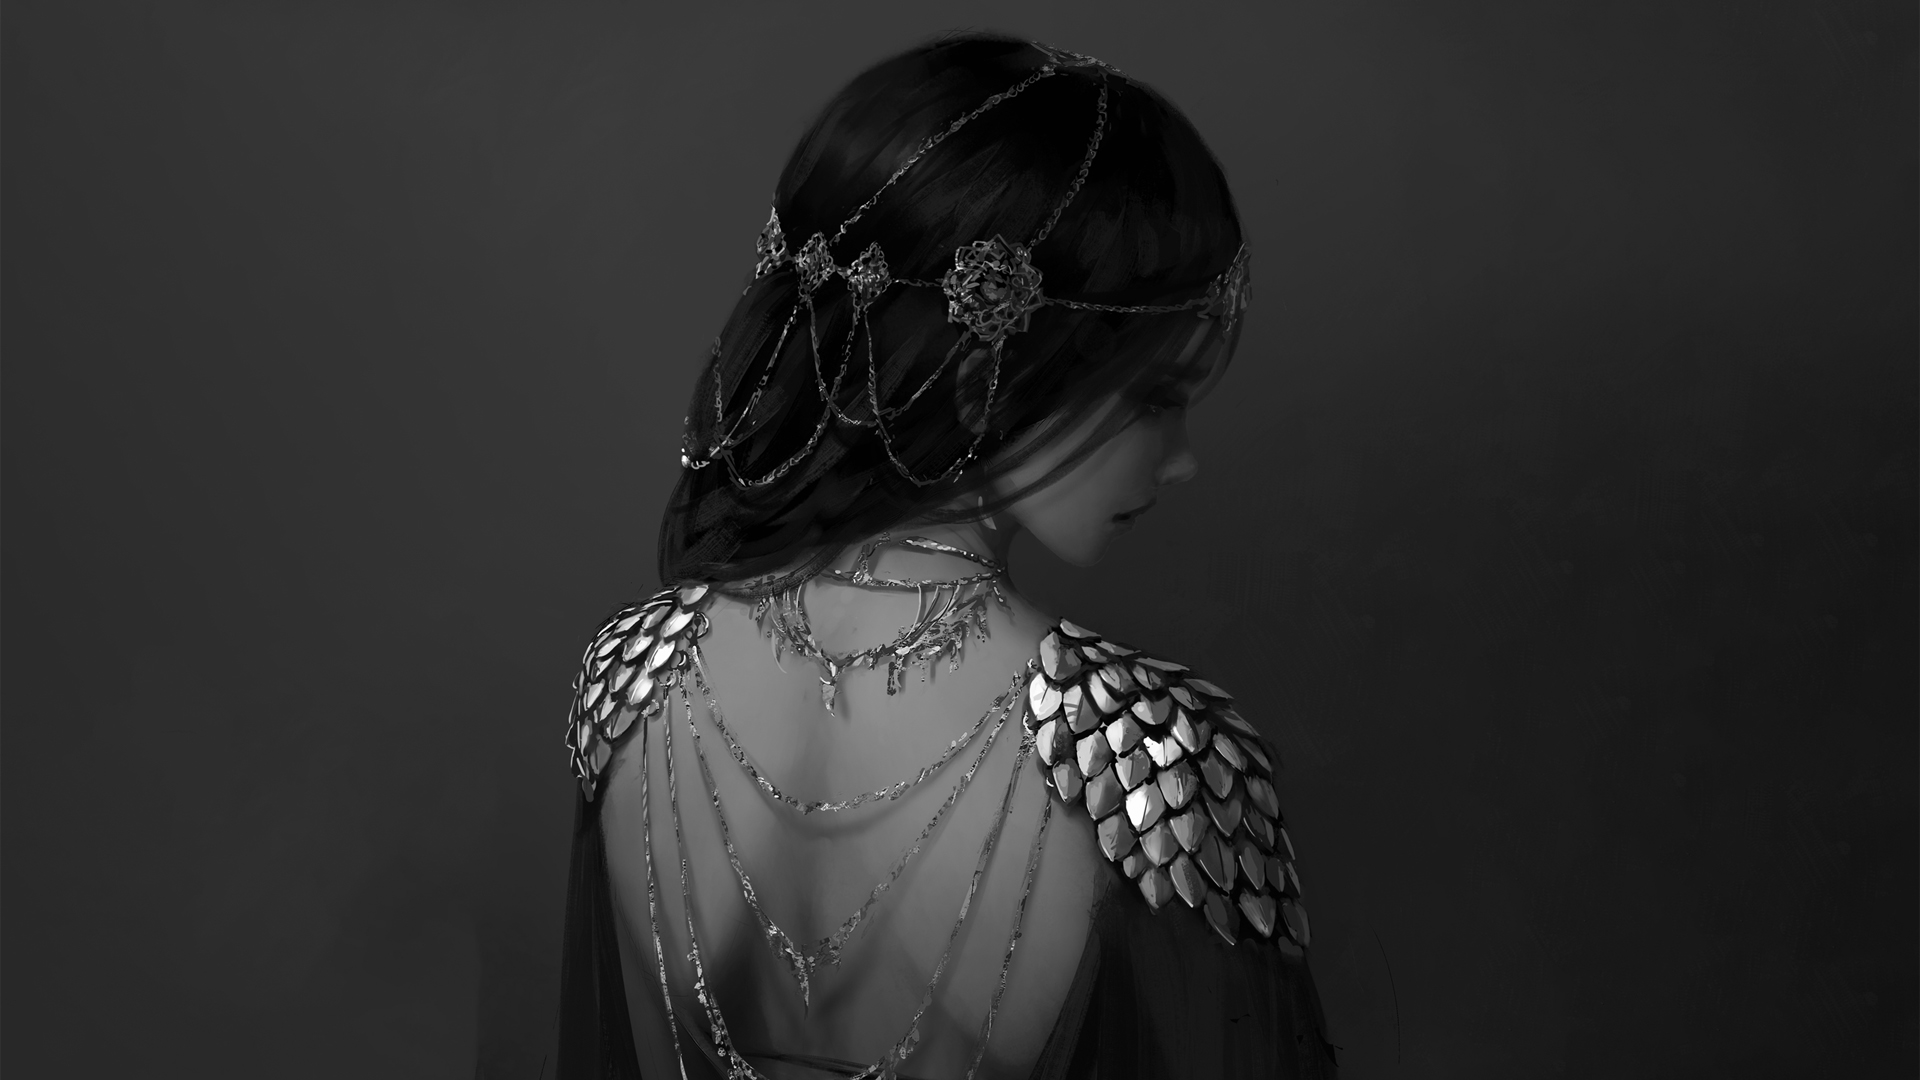

In [5]:
# test
test_tensor = image_to_tensor("Images/42dcfb28c5f27723e0f086f158a09310.png")
test_tensor.shape
test_image = tensor_to_image(test_tensor)
test_image

# tensor_to_image - 考虑了多通道

In [6]:
from PIL import Image
import numpy as np

def tensor_to_image(tensor: np.ndarray, save_path: str = None) -> Image.Image:
    # 假设输入 tensor 是二维或三维 numpy 数组
    if tensor.ndim == 2:
        # 如果是二维数组，假设是灰度图像
        mode = 'L'
        tensor = tensor.astype(np.uint8)
    elif tensor.ndim == 3 and tensor.shape[2] == 3:
        # 如果是三维数组，且第三维度大小为3，假设是RGB图像
        mode = 'RGB'
        tensor = tensor.astype(np.uint8)
    else:
        raise ValueError("输入的 tensor 必须是一个二维数组或者是一个形状为 (H, W, 3) 的三维数组")

    # 如果值在 0-1 之间，将其缩放到 0-255 之间
    if tensor.max() <= 1.0:
        tensor = (tensor * 255).astype(np.uint8)

    # 将 numpy 数组转换为 PIL 图像
    image = Image.fromarray(tensor, mode=mode)

    # 如果提供了保存路径，将图像保存
    if save_path:
        image.save(save_path)

    return image

# image_to_tensor - 考虑了多通道

In [7]:
from PIL import Image
import numpy as np

def image_to_tensor(image_path: str) -> np.ndarray:
    # 打开图像文件
    image = Image.open(image_path)

    # 将 PIL 图像转换为 numpy 数组
    tensor = np.array(image)

    return tensor

(1080, 1920, 3)


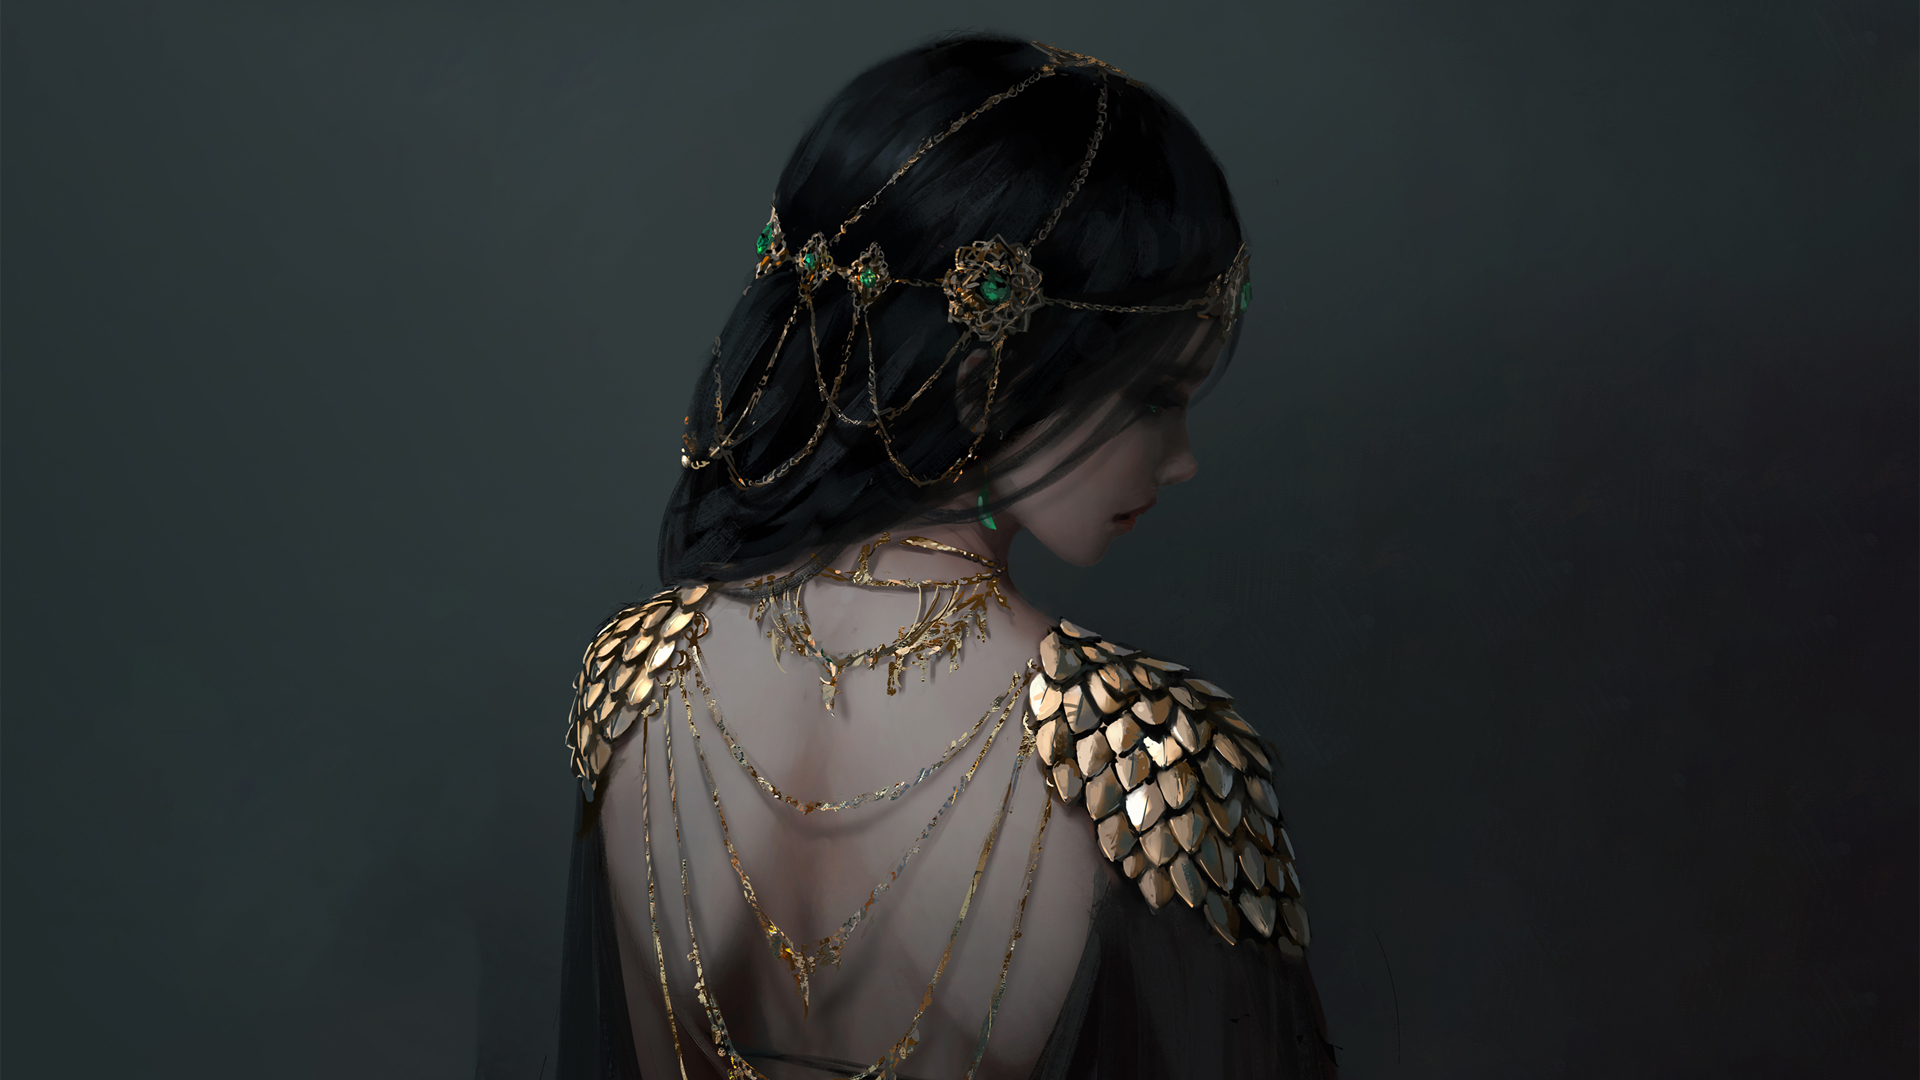

In [8]:
# test
test_tensor = image_to_tensor("Images/42dcfb28c5f27723e0f086f158a09310.png")
print(test_tensor.shape)
test_image = tensor_to_image(test_tensor)
test_image